# **Importowanie bibliotek**

In [2]:
from PyPDF2 import PdfReader
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Łukasz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Funkcja czytająca pliki w formacie PDF**
Funkcja `read_pdf` służy do odczytywania zawartości plików PDF. Przyjmuje argument `file_path`, który jest ścieżką do pliku PDF.

In [3]:
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        num_pages = len(pdf_reader.pages)

        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
        
        return text

In [6]:
book1_path = 'books/J.R.R. Tolkien - Hobbit, czyli tam i z powrotem.pdf'
book2_path = 'books/J.R.R. Tolkien - Władca pierścieni. Bractwo Pierścienia. Tom 1.pdf'
book3_path = 'books/J.R.R. Tolkien - Władca Pierścieni. Dwie Wieże. Tom 2.pdf'
book4_path = 'books/J.R.R. Tolkien - Władca Pierścieni. Powrót Króla. Tom 3.pdf'

book1 = read_pdf(book1_path)
book2 = read_pdf(book2_path)
book3 = read_pdf(book3_path)
book4 = read_pdf(book4_path)

# **Funkcja do czyszczenia i tokenizacji tekstu**

Funkcja `cleaned_book` to zmodyfikowana i zoptymalizowana funkcja do czyszczenia tekstu, którą wykorzystywaliśmy na zajęciach. Pozbawiona została ona linijek kodu odpowiedzialnych za usuwanie nazw użytkowników, wzmianek, oznaczeń, tagowań, retweetów, url-ów, a także kodu HTMLowego. W procesie czyszczenia wykorzystuje ona wbudowaną w bibliotece NLTK funkcję odpowiedzialną za tokenizację tekstu `nltk.word_tokenize` oraz plik `polish_stopwords.txt` zawierający polskie stopwordsy, do którego dodany został zbiór zawierający zgłoski lub przypadkowe zlepy liter, które same w sobie nie mają żadnego znaczenia i które powstały wskutek błędnego zinterpretowania tekstu. To pomoże uzyskać lepsze wyniki w dalszych krokach podczas generowania chmur słów czy analizy tematycznej.

In [7]:
def cleaned_book(text):
    temp = re.sub("\s{2,}", " ", text) #usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp) #usunięcie przerw między słowami, entery
    temp = temp.lower() #zamienia wszystkie znaki na małe litery
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) #usunięcie znaków specjalnych
    #temp = re.sub("\d", "", temp) #usunięcie cyfr
    temp = re.sub("[^\w\s]", "", temp) #usunięcie znaków specjalnych
    temp = temp.strip() #usunięcie spacji lub odstępów na końcach tekstu
    
    #Implementacja stopwordsów dla języka polskiego z pliku polish_stopwords.txt oraz dodanie do zbioru wyrażeń powstałych wskutek błędnego oczyszczenia tekstu
    with open("polish_stopwords.txt", "r", encoding="utf-8") as file:
        polish_stopwords = [line.strip() for line in file.readlines()]
        
    stopwords = polish_stopwords + ['pa', 'ba', 'zd', 'ec', 'pi', 'cza', 'cze', 'pie', 'gło', 'la', 'zw', 'roz', 'ra', 'si', 
                                    'ac', 'sci', 'ał', 'ły', 'sc', 'ju', 'mo', 'wi', 'ście', 'ąc', 'ął', 'smy', 'ło', 'scie', 
                                    'ni', 'ad', 'ła', 'ść', 'zy', 'sli', 'ści', 'śli', 'łem', 'mia', 'śmy', 'ęli', 'ko', 'ace',
                                    'gimli', 'snie', 'ęc', 'ąć', 'acy', 'agn', 'ksi', 'acych', 'edzy', 'ży', 'łe', 'eli', 'edzie', 'sród']
    
    #Tokenizacja tekstu za pomocą biblioteki NLTK
    cleaned_and_tokenized = nltk.word_tokenize(temp)
    
    #Usunięcie stopwordsów
    cleaned_and_tokenized_without_stopwords = [word for word in cleaned_and_tokenized if word.lower() not in stopwords]
    
    return cleaned_and_tokenized_without_stopwords

# **Oczyszczenie książek**

In [8]:
book1_cleaned = cleaned_book(book1)
book2_cleaned = cleaned_book(book2)
book3_cleaned = cleaned_book(book3)
book4_cleaned = cleaned_book(book4)

# **Policzenie wszystkich słów w korpusie składającym się z 4 książek**

In [9]:
total_words = len(book1_cleaned) + len(book2_cleaned) + len(book3_cleaned) + len(book4_cleaned)

print("Liczba wszystkich słów w korpusie:", total_words)

Liczba wszystkich słów w korpusie: 353339


# **Wygenerowanie chmury słów dla słów występujących we wszystkich 4 książkach**

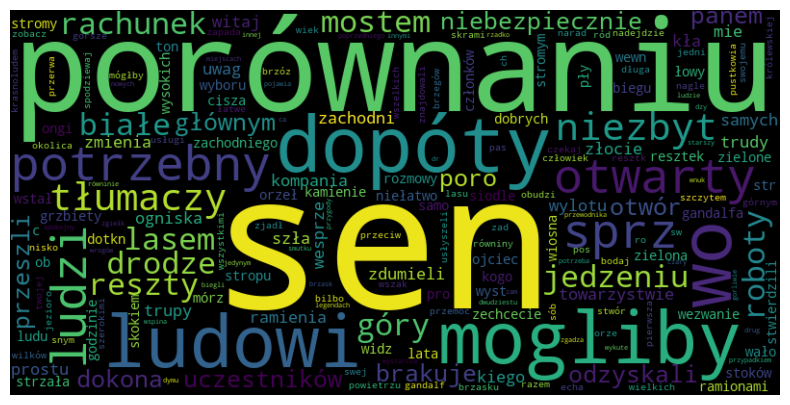

In [10]:
common_words = set(book1_cleaned).intersection(book2_cleaned, book3_cleaned, book4_cleaned)

wordcloud_common = WordCloud(width=800, height=400).generate(' '.join(common_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_common, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Wygenerowanie chmur słów dla unikatowych słów występujących tylko w poszczególnych książkach**

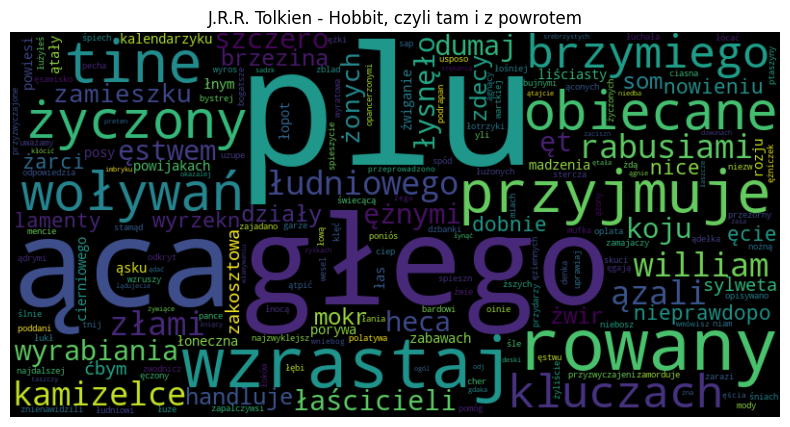

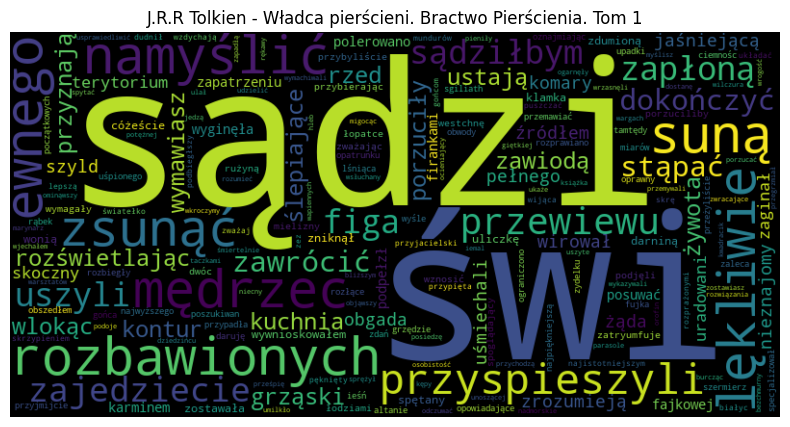

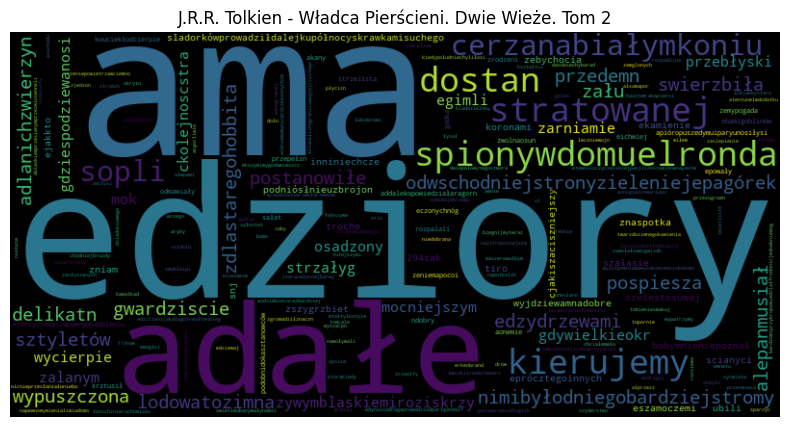

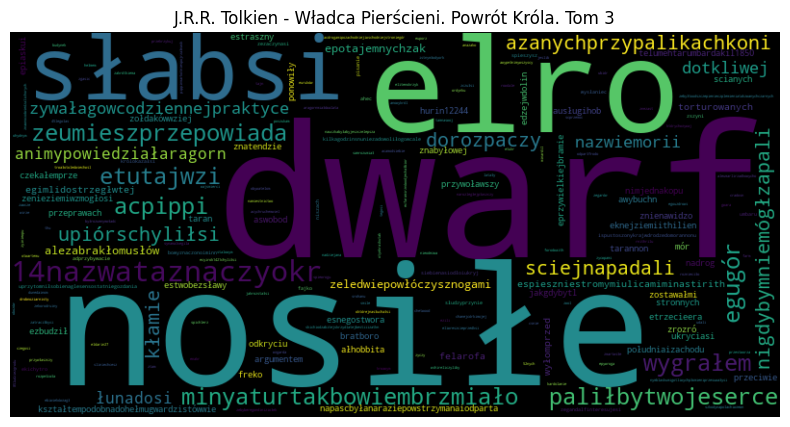

In [11]:
unique_words_book1 = set(book1_cleaned) - set(book2_cleaned) - set(book3_cleaned) - set(book4_cleaned)
unique_words_book2 = set(book2_cleaned) - set(book1_cleaned) - set(book3_cleaned) - set(book4_cleaned)
unique_words_book3 = set(book3_cleaned) - set(book1_cleaned) - set(book2_cleaned) - set(book4_cleaned)
unique_words_book4 = set(book4_cleaned) - set(book1_cleaned) - set(book2_cleaned) - set(book3_cleaned)

wordcloud_book1 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book1))
wordcloud_book2 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book2))
wordcloud_book3 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book3))
wordcloud_book4 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book4))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_book1, interpolation='bilinear')
plt.title('J.R.R. Tolkien - Hobbit, czyli tam i z powrotem')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_book2, interpolation='bilinear')
plt.title('J.R.R Tolkien - Władca pierścieni. Bractwo Pierścienia. Tom 1')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_book3, interpolation='bilinear')
plt.title('J.R.R. Tolkien - Władca Pierścieni. Dwie Wieże. Tom 2')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_book4, interpolation='bilinear')
plt.title('J.R.R. Tolkien - Władca Pierścieni. Powrót Króla. Tom 3')
plt.axis('off')
plt.show()

# **Grupowanie książek metodą k-means**

W tym projekcie do grupowania książek autorstwa J.R.R. Tolkiena wykorzystano **algorytm centroidów (k-means clustering)** będącym jednym z najpopularniejszych algorytmów stosowanych w analizie skupień. Ma on na celu podział zbioru danych na K liczbę grup.

Algorytm k-means w Text Mining rozpoczyna proces eksploracji tekstu od wosowego wybrania centroidów, czyli punktów reprezentujących środki grup. Następnie algorytm iteracyjnie oblicza odległość każdego punktu danych od każdego centroidu i przypisuje go do grupy, której centroid jest najbliższy. W tym projekcie bazą jest saga powieści J.R.R. Tolkiena składająca się z Hobbita oraz 3 części Władcy pierścieni, więc w tym przypadku algorytm nie będzie miał trudnego zadania do wykonania. Proces przypisywania punktów danych do grup i aktualizacji centroidów jest powtarzany aż do momentu, gdy punkty przestają zmieniać przypisanie (położenie) lub gdy osiągnięta zostanie maksymalna liczba iteracji.

Grupowania książek dokonano za pomocą algotymu k-means, ale z wykorzystaniem 3 różnych reprezentacji tekstowych - Bag of words, TF-IDF oraz word embedding.

### Przygotowanie danych

In [20]:
books = [book1_cleaned, book2_cleaned, book3_cleaned, book4_cleaned]
book_titles = ['Hobbit', 'Władca Pierścieni: Bractwo Pierścienia', 'Władca Pierścieni: Dwie Wieże', 'Władca Pierścieni: Powrót Króla']

#Połączenie treści książek w pojedyncze ciągi znaków
books_combined = [' '.join(book) for book in books]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

#Tworzenie reprezentacji Bag-of-Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(books_combined)

#Grupowanie k-means
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

#Przypisanie książek do grup
book_groups = {}
for i, label in enumerate(kmeans.labels_):
    if label not in book_groups:
        book_groups[label] = []
    book_groups[label].append(book_titles[i])

#Wyświetlenie wyników grupowania posortowanych według etykiet grupy
for label in sorted(book_groups.keys()):
    books = book_groups[label]
    print(f"Grupa {label+1}:")
    for book in books:
        print(f"- {book}")
    print()

Grupa 1:
- Władca Pierścieni: Bractwo Pierścienia

Grupa 2:
- Hobbit
- Władca Pierścieni: Dwie Wieże
- Władca Pierścieni: Powrót Króla



Grupowanie za pomocą TF-IDF:

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

#Tworzenie reprezentacji TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(books_combined)

#Grupowanie k-means
k = 2  #liczba grup
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

#Przypisanie książek do grup
book_groups = {}
for i, label in enumerate(kmeans.labels_):
    if label not in book_groups:
        book_groups[label] = []
    book_groups[label].append(book_titles[i])

#Wyświetlenie wyników grupowania posortowanych według etykiet grupy
for label in sorted(book_groups.keys()):
    books = book_groups[label]
    print(f"Grupa {label+1}:")
    for book in books:
        print(f"- {book}")
    print()

Grupa 1:
- Hobbit

Grupa 2:
- Władca Pierścieni: Bractwo Pierścienia
- Władca Pierścieni: Dwie Wieże
- Władca Pierścieni: Powrót Króla



Grupowanie za pomocą word embeddings:

In [39]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

#Przygotowanie modelu word embedding
model = Word2Vec([book.split() for book in books_combined], min_count=1)

#Tworzenie reprezentacji wektorowej dla każdej książki
book_embeddings = np.array([np.mean([model.wv[word] for word in book.split() if word in model.wv] or [np.zeros(model.vector_size)], axis=0) for book in books_combined])

#Grupowanie k-means
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(book_embeddings)

#Przypisanie książek do grup
book_groups = {}
for i, label in enumerate(kmeans.labels_):
    if label not in book_groups:
        book_groups[label] = []
    book_groups[label].append(book_titles[i])

#Wyświetlenie wyników grupowania posortowanych według etykiet grupy
for label in sorted(book_groups.keys()):
    books = book_groups[label]
    print(f"Grupa {label+1}:")
    for book in books:
        print(f"- {book}")
    print()


Grupa 1:
- Władca Pierścieni: Bractwo Pierścienia
- Władca Pierścieni: Dwie Wieże
- Władca Pierścieni: Powrót Króla

Grupa 2:
- Hobbit



c:\Users\Łukasz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Modele wątków (topic modelling)**

Analiza tematyczna za pomocą modelu **LDA (Latent Dirichlet Allocation)** jest techniką wykorzystywaną do identyfikacji ukrytych tematów w tekście. Model LDA zakłada, że każdy dokument składa się z różnych tematów, a każde słowo w dokumencie jest przypisane do jednego z tych tematów. Istnieją jednak odstępstwa od tej reguły, co można zaobserwować na poniższym przykładzie. Wynika to z faktu, iż analizowanym zbiorem dokumentów jest saga powieści autorstwa J.R.R Tolkiena, w której wątki muszą się zazębiać. Stąd hasło "frodo" dotyczące jednego z głównych bohaterów, Frodo Bagginsa, pojawia się w więcej niż jednym dokumencie.

W przypadku poniższej analizy model LDA został zastosowany do czterech książek: "Hobbit, czyli tam i z powrotem", "Władca pierścieni. Bractwo Pierścienia. Tom 1", "Władca Pierścieni. Dwie Wieże. Tom 2" oraz "Władca Pierścieni. Powrót Króla. Tom 3". Do każdej książki został przypisany temat o indeksie 0, aby uzyskać motyw przewodni danej książki, a następnie zostały wypistowane słowa kluczowe wraz z ich wagami.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Przygotowanie korpusu tekstowego
corpus = [book1_cleaned, book2_cleaned, book3_cleaned, book4_cleaned]
book_titles = ["Hobbit, czyli tam i z powrotem", "Władca pierścieni. Bractwo Pierścienia. Tom 1",
               "Władca Pierścieni. Dwie Wieże. Tom 2", "Władca Pierścieni. Powrót Króla. Tom 3"]

#Inicjalizacja TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus)

#Konfiguracja i dopasowanie modelu LDA dla każdej książki
for book_idx, book in enumerate(corpus):
    lda = LatentDirichletAllocation(n_components=1, random_state=42)
    lda.fit(X[book_idx])

    #Wyświetlenie wyników
    print(f"Book #{book_idx+1}: {book_titles[book_idx]}")
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Temat #{topic_idx}:")
        top_words_indices = topic.argsort()[:-11:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        top_word_scores = [topic[i] for i in top_words_indices]
        for word, score in zip(top_words, top_word_scores):
            print(f"{word}: {score}")
        print()

Book #1: Hobbit, czyli tam i z powrotem
Temat #0:
bilbo: 1.381430634074325
rzek: 1.162356162086536
thorin: 1.1595616604877497
gobliny: 1.1210392097544242
gandalf: 1.1141455986720115
krasnoludy: 1.1098917254295597
góry: 1.105637852187109
móg: 1.1028297711187365
hobbit: 1.0921672535860227
powiedzia: 1.0910542084302957

Book #2: Władca pierścieni. Bractwo Pierścienia. Tom 1
Temat #0:
frodo: 1.4710967110058488
rzekł: 1.2286447065162864
pierścień: 1.1593368456377178
gandalf: 1.1484925031246214
powiedział: 1.1388006738878504
odparł: 1.137252710982031
obieżyświat: 1.1156003905428904
chociaż: 1.1115584188455705
froda: 1.1047454899598532
krzyknął: 1.103474475450934

Book #3: Władca Pierścieni. Dwie Wieże. Tom 2
Temat #0:
rzekł: 1.2642043671136534
frodo: 1.2376837079184617
odparł: 1.1769506469042972
aragorn: 1.1499581753424994
powiedział: 1.1342125669314678
gandalf: 1.1256656502507716
gollum: 1.1195356185311967
wie: 1.1121795804677095
ziemi: 1.1048235424042254
gór: 1.0956284948248753

Book #4: W

Książka 1: **J.R.R. Tolkien - "Hobbit, czyli tam i z powrotem"**<br>
W tej książce tematem przewodnim wydaje się być podróż i przygody bohatera o imieniu Bilbo. Wśród kluczowych słów występujących w tym temacie znajdują się "bilbo", "rzek", "thorin", "gobliny", "gandalf", "krasnoludy", "góry", "móg", "hobbit", "powiedzia". Sugeruje to, że książka opowiada o przygodach Bilbo Bagginsa, który wyrusza na wyprawę z grupą krasnoludów, spotykając różnorodne postacie i przemierzając górzyste tereny.

Książka 2: **J.R.R. Tolkien - "Władca pierścieni. Bractwo Pierścienia. Tom 1"**<br>
W tej książce tematem przewodnim jest Pierścień i losy Frodo Bagginsa. Słowa kluczowe, takie jak "frodo", "rzekł", "pierścień", "gandalf", "powiedział", "odparł", "obieżyświat", "chociaż", "froda", "krzyknął", sugerują, że książka skupia się na podróży Frodo, który wyrusza w misję z Pierścieniem, mającym ogromne znaczenie dla losów Śródziemia.

Książka 3: **J.R.R. Tolkien - "Władca Pierścieni. Dwie Wieże. Tom 2"**<br>
Ta książka kontynuuje historię Pierścienia i skupia się na działaniach różnych bohaterów, takich jak Frodo, Aragorn czy Gandalf. Słowa kluczowe w tym temacie, takie jak "rzekł", "frodo", "odparł", "aragorn", "powiedział", "gandalf", "gollum", "wie", "ziemi", "gór", sugerują, że książka opowiada o dalszych losach Pierścienia i przygotowaniach do ostatecznej bitwy o Śródziemie.

Książka 4: **J.R.R. Tolkien - "Władca Pierścieni. Powrót Króla. Tom 3"**<br>
Ta książka to finałowa część sagi i koncentruje się na rozwiązaniu wątków i ostatecznej konfrontacji. Słowa kluczowe, takie jak "frodo", "wie", "rzekł", "odparł", "aragorn", "powiedział", "gandalf", "pippin", "gondoru", "merry", sugerują, że książka opowiada o decydującej bitwie o Śródziemie, powrocie króla do Gondoru i losach głównych bohaterów, w tym Frodo i jego towarzyszy. Pippin to nie słowo przypadkowe. Tak nazywany był Peregin Tuk, jeden z bohaterów powieści Tolkiena, członek Drużyny Pierścienia, najmłodszy uczestnik wyprawy, przyjaciel Frodo.

Na podstawie powyżej przeprowadzonej za pomocą modelu LDA analizy tematycznej można stwierdzić, iż powieści autorstwa J.R.R. Tolkiena nie wykluczają się wzajemnie, ale uzupełniają się do całości. Z tej analizy można również wywnioskować, jakie wątki zostały poruszone w poszczególnych częściach sagi, co stanowi wartościową informację, ponieważ można się zorientować, o czym będzie dana powieść. 


# **Budowa klasyfikatorów**

W tym przypadku, każda książka jest traktowana jako osobna klasa. Możesz zastosować taki podział, aby klasyfikator rozpoznawał, do której konkretnej książki należy nowy tekst na podstawie analizy terminologicznej.

### Implementacja 4 dodatkowych powieści J.R.R. Tolkiena

W celu sprawdzenia, jak klasyfikatory radzą sobie z przydzielaniem przykładowych fragmentów tekstu do danych książek, rozszerzono próbkę badawczą o 4 inne powieści autorstwa J.R.R. Tolkiena.

In [128]:
book5_path = 'J.R.R. Tolkien - Silmarillion.pdf'
book5 = read_pdf(book5_path)
book5_cleaned = cleaned_book(book5)

book6_path = 'J.R.R. Tolkien - Niedokończone opowieści.pdf'
book6 = read_pdf(book6_path)
book6_cleaned = cleaned_book(book6)

book7_path = 'J.R.R. Tolkien - Księga zaginionych opowieści.pdf'
book7 = read_pdf(book7_path)
book7_cleaned = cleaned_book(book7)

book8_path = 'J.R.R. Tolkien - Upadek Gondolinu.pdf'
book8 = read_pdf(book8_path)
book8_cleaned = cleaned_book(book8)

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Dane tekstowe książek i odpowiadające etykiety
books_corpus = [' '.join(book1), ' '.join(book2), ' '.join(book3), ' '.join(book4), ' '.join(book5), ' '.join(book6), ' '.join(book7), ' '.join(book8)]
labels = ['Inna powieść', 'Władca Pierścieni', 'Władca Pierścieni', 'Władca Pierścieni', 'Inna powieść', 'Inna powieść', 'Inna powieść', 'Inna powieść']

# Tworzenie wektorów cech przy użyciu TfidfVectorizer
vectorizer = CountVectorizer(analyzer='char')
X = vectorizer.fit_transform(books_corpus)

# Podział danych na zbiór treningowy i testowy z uwzględnieniem stratyfikacji
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, stratify=labels, random_state=42)

# Inicjalizacja klasyfikatora Naive Bayes
classifier_nb = MultinomialNB()

# Trenowanie klasyfikatora
classifier_nb.fit(X_train, y_train)

# Przewidywanie klasy dla przykładowego tekstu
sample_text = "Frodo wędruje przez niebezpieczne ziemie Śródziemia, niosąc ze sobą Pierścień, który posiada ogromną moc. Towarzyszą mu wierni przyjaciele: Sam, Merry i Pippin. Czy uda im się pokonać ciemne siły i uratować świat?"
sample_text_cleaned = cleaned_book(sample_text)
sample_vector = vectorizer.transform([' '.join(sample_text_cleaned)])
prediction = classifier_nb.predict(sample_vector)[0]
print(f"Tekst do klasyfikacji:\n{sample_text}")
print("Przewidywana klasa:", prediction)

# Przewidywanie klas dla zbioru testowego
y_pred = classifier_nb.predict(X_test)

# Obliczenie dokładności klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)

# Macierz pomyłek
confusion_mat_nb = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(confusion_mat_nb)

Tekst do klasyfikacji:
Frodo wędruje przez niebezpieczne ziemie Śródziemia, niosąc ze sobą Pierścień, który posiada ogromną moc. Towarzyszą mu wierni przyjaciele: Sam, Merry i Pippin. Czy uda im się pokonać ciemne siły i uratować świat?
Przewidywana klasa: Inna powieść
Dokładność klasyfikacji: 0.5
Macierz pomyłek:
[[1 0]
 [1 0]]


In [127]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Dane tekstowe książek i odpowiadające etykiety
books_corpus = [' '.join(book1_cleaned), ' '.join(book2_cleaned), ' '.join(book3_cleaned), ' '.join(book4_cleaned), ' '.join(book5_cleaned), ' '.join(book6_cleaned), ' '.join(book7_cleaned), ' '.join(book8_cleaned)]
labels = ['Inna powieść', 'Władca Pierścieni', 'Władca Pierścieni', 'Władca Pierścieni', 'Inna powieść', 'Inna powieść', 'Inna powieść', 'Inna powieść']

# Tworzenie wektorów cech przy użyciu CountVectorizer z wagą binarną
vectorizer = CountVectorizer(binary=True)
X_binary = vectorizer.fit_transform(books_corpus)

# Podział danych na zbiór treningowy i testowy z uwzględnieniem stratyfikacji
X_train, X_test, y_train, y_test = train_test_split(X_binary, labels, test_size=0.2, stratify=labels, random_state=42)

# Inicjalizacja klasyfikatora Random Forest
classifier_rf = RandomForestClassifier(random_state=42)

# Trenowanie klasyfikatora Random Forest
classifier_rf.fit(X_train.toarray(), y_train)

# Przewidywanie klasy dla przykładowego tekstu
sample_text = "Frodo wędruje przez niebezpieczne ziemie Śródziemia, niosąc ze sobą Pierścień, który posiada ogromną moc. Towarzyszą mu wierni przyjaciele: Sam, Merry i Pippin. Czy uda im się pokonać ciemne siły i uratować świat?"
sample_text_cleaned = cleaned_book(sample_text)
sample_vector = vectorizer.transform([' '.join(sample_text_cleaned)])
prediction_rf = classifier_rf.predict(sample_vector)[0]
print(f"Tekst do klasyfikacji:\n{sample_text}")
print("Przewidywana klasa (Random Forest):", prediction_rf)

# Przewidywanie klas dla zbioru testowego
y_pred_rf = classifier_rf.predict(X_test.toarray())

# Obliczenie dokładności klasyfikacji Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Dokładność klasyfikacji Random Forest:", accuracy_rf)

# Macierz pomyłek Random Forest
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("Macierz pomyłek Random Forest:")
print(confusion_mat_rf)

# Inicjalizacja klasyfikatora Gradient Boosting
classifier_gb = GradientBoostingClassifier(random_state=42)

# Trenowanie klasyfikatora Gradient Boosting
classifier_gb.fit(X_train.toarray(), y_train)

# Przewidywanie klasy dla przykładowego tekstu
prediction_gb = classifier_gb.predict(sample_vector)[0]
print("Przewidywana klasa (Gradient Boosting):", prediction_gb)

# Przewidywanie klas dla zbioru testowego
y_pred_gb = classifier_gb.predict(X_test.toarray())

# Obliczenie dokładności klasyfikacji Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Dokładność klasyfikacji Gradient Boosting:", accuracy_gb)

# Macierz pomyłek Gradient Boosting
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)
print("Macierz pomyłek Gradient Boosting:")
print(confusion_mat_gb)

Tekst do klasyfikacji:
Frodo wędruje przez niebezpieczne ziemie Śródziemia, niosąc ze sobą Pierścień, który posiada ogromną moc. Towarzyszą mu wierni przyjaciele: Sam, Merry i Pippin. Czy uda im się pokonać ciemne siły i uratować świat?
Przewidywana klasa (Random Forest): Inna powieść
Dokładność klasyfikacji Random Forest: 0.5
Macierz pomyłek Random Forest:
[[1 0]
 [1 0]]
Przewidywana klasa (Gradient Boosting): Inna powieść
Dokładność klasyfikacji Gradient Boosting: 0.5
Macierz pomyłek Gradient Boosting:
[[1 0]
 [1 0]]


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from gensim.models import KeyedVectors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Dane tekstowe książek i odpowiadające etykiety
books_corpus = [' '.join(book1_cleaned), ' '.join(book2_cleaned), ' '.join(book3_cleaned), ' '.join(book4_cleaned), ' '.join(book5_cleaned), ' '.join(book6_cleaned), ' '.join(book7_cleaned), ' '.join(book8_cleaned)]
labels = ['Inna powieść', 'Władca Pierścieni', 'Władca Pierścieni', 'Władca Pierścieni', 'Inna powieść', 'Inna powieść', 'Inna powieść', 'Inna powieść']

# Wczytanie modelu word2vec polskiego języka
word2vec_model_path = 'nkjp-forms-all-100-cbow-hs.txt'
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=False)

# Generowanie wektorów cech dla danych tekstowych książek
def generate_feature_vector(text):
    words = text.split()
    feature_vector = np.zeros(word2vec_model.vector_size)
    for word in words:
        if word in word2vec_model:
            feature_vector += word2vec_model[word]
    return feature_vector

X = np.array([generate_feature_vector(book) for book in books_corpus])

# Przeskalowanie wektorów cech do zakresu od 0 do 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy z uwzględnieniem stratyfikacji
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, stratify=labels, random_state=42)

# Inicjalizacja klasyfikatora Naive Bayes
classifier_nb = MultinomialNB()

# Trenowanie klasyfikatora
classifier_nb.fit(X_train, y_train)

# Przewidywanie klasy dla przykładowego tekstu
sample_text = "Frodo wędruje przez niebezpieczne ziemie Śródziemia, niosąc ze sobą Pierścień, który posiada ogromną moc. Towarzyszą mu wierni przyjaciele: Sam, Merry i Pippin. Czy uda im się pokonać ciemne siły i uratować świat?"
sample_vector = generate_feature_vector(sample_text)
sample_vector = np.array([sample_vector])
sample_vector = scaler.transform(sample_vector)
prediction = classifier_nb.predict(sample_vector)[0]
print(f"Tekst do klasyfikacji:\n{sample_text}")
print("Przewidywana klasa:", prediction)

# Przewidywanie klas dla zbioru testowego
y_pred = classifier_nb.predict(X_test)

# Obliczenie dokładności klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)

# Macierz pomyłek
confusion_mat_nb = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(confusion_mat_nb)

Tekst do klasyfikacji:
Frodo wędruje przez niebezpieczne ziemie Śródziemia, niosąc ze sobą Pierścień, który posiada ogromną moc. Towarzyszą mu wierni przyjaciele: Sam, Merry i Pippin. Czy uda im się pokonać ciemne siły i uratować świat?
Przewidywana klasa: Inna powieść
Dokładność klasyfikacji: 0.5
Macierz pomyłek:
[[1 0]
 [1 0]]


# **Wskaźniki polaryzacji nastroju dla analizowanych książek J.R.R. Tolkiena**

### Analiza sentymentu z wykorzystaniem NLTK

In [28]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Inicjalizacja analizatora sentymentu
sia = SentimentIntensityAnalyzer()

# Analiza sentymentu dla przykładowych tekstów
book1_nltk_sentiment = sia.polarity_scores(' '.join(book1_cleaned))
book2_nltk_sentiment = sia.polarity_scores(' '.join(book2_cleaned))
book3_nltk_sentiment = sia.polarity_scores(' '.join(book3_cleaned))
book4_nltk_sentiment = sia.polarity_scores(' '.join(book4_cleaned))

# Wyświetlenie wyników
print("Wskaźniki polaryzacji nastroju z wykorzystaniem NLTK:")
print("Book 1 Sentiment:", book1_nltk_sentiment)
print("Book 2 Sentiment:", book2_nltk_sentiment)
print("Book 3 Sentiment:", book3_nltk_sentiment)
print("Book 4 Sentiment:", book4_nltk_sentiment)

Wskaźniki polaryzacji nastroju z wykorzystaniem NLTK:
Book 1 Sentiment: {'neg': 0.004, 'neu': 0.993, 'pos': 0.002, 'compound': -0.9985}
Book 2 Sentiment: {'neg': 0.0, 'neu': 0.994, 'pos': 0.006, 'compound': 0.9999}
Book 3 Sentiment: {'neg': 0.005, 'neu': 0.988, 'pos': 0.006, 'compound': 0.9995}
Book 4 Sentiment: {'neg': 0.002, 'neu': 0.991, 'pos': 0.007, 'compound': 0.9999}


### Analiza sentymentu z wykorzystaniem TextBlob

In [29]:
from textblob import TextBlob

# Funkcja do wyznaczania wskaźnika polaryzacji nastroju dla danej książki
def calculate_sentiment_polarity(book):
    text = ' '.join(book)
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity

# Obliczanie wskaźników polaryzacji nastroju dla każdej z książek
book1_textblob_sentiment = calculate_sentiment_polarity(book1_cleaned)
book2_textblob_sentiment = calculate_sentiment_polarity(book2_cleaned)
book3_textblob_sentiment = calculate_sentiment_polarity(book3_cleaned)
book4_textblob_sentiment = calculate_sentiment_polarity(book4_cleaned)

# Wyświetlanie wskaźników polaryzacji nastroju dla każdej z książek
print("Wskaźniki polaryzacji nastroju z wykorzystaniem TextBlob:")
print("Hobbit, czyli tam i z powrotem:", book1_textblob_sentiment)
print("Władca pierścieni. Bractwo Pierścienia. Tom 1:", book2_textblob_sentiment)
print("Władca Pierścieni. Dwie Wieże. Tom 2:", book3_textblob_sentiment)
print("Władca Pierścieni. Powrót Króla. Tom 3:", book4_textblob_sentiment)

Wskaźniki polaryzacji nastroju z wykorzystaniem TextBlob:
Hobbit, czyli tam i z powrotem: 0.028156028368794328
Władca pierścieni. Bractwo Pierścienia. Tom 1: 0.1574074074074074
Władca Pierścieni. Dwie Wieże. Tom 2: -0.043571428571428594
Władca Pierścieni. Powrót Króla. Tom 3: 0.13237179487179487


### Analiza sentymentu z wykorzystaniem vaderSentiment

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicjalizacja analizatora sentymentu
sia = SentimentIntensityAnalyzer()

# Analiza sentymentu dla przykładowych tekstów
book1_vader_sentiment = sia.polarity_scores(' '.join(book1_cleaned))
book2_vader_sentiment = sia.polarity_scores(' '.join(book2_cleaned))
book3_vader_sentiment = sia.polarity_scores(' '.join(book3_cleaned))
book4_vader_sentiment = sia.polarity_scores(' '.join(book4_cleaned))

# Wyświetlenie wyników
print("Wskaźniki polaryzacji nastroju z wykorzystaniem vaderSentiment:")
print("Book 1 Sentiment:", book1_vader_sentiment)
print("Book 2 Sentiment:", book2_vader_sentiment)
print("Book 3 Sentiment:", book3_vader_sentiment)
print("Book 4 Sentiment:", book4_vader_sentiment)

Wskaźniki polaryzacji nastroju z wykorzystaniem vaderSentiment:
Book 1 Sentiment: {'neg': 0.004, 'neu': 0.991, 'pos': 0.005, 'compound': 0.9983}
Book 2 Sentiment: {'neg': 0.0, 'neu': 0.994, 'pos': 0.006, 'compound': 0.9999}
Book 3 Sentiment: {'neg': 0.005, 'neu': 0.988, 'pos': 0.008, 'compound': 0.9999}
Book 4 Sentiment: {'neg': 0.002, 'neu': 0.99, 'pos': 0.008, 'compound': 1.0}


In [31]:
import pandas as pd

# Tworzenie tabeli z wynikami
data = {
    'Book': ['Hobbit', 'Władca Pierścieni: Bractwo Pierścienia', 'Władca Pierścieni: Dwie Wieże', 'Władca Pierścieni: Powrót Króla'],
    'NLTK Polarity': [book1_nltk_sentiment['compound'], book2_nltk_sentiment['compound'], book3_nltk_sentiment['compound'], book4_nltk_sentiment['compound']],
    'VaderSentiment Polarity': [book1_vader_sentiment['compound'], book2_vader_sentiment['compound'], book3_vader_sentiment['compound'], book4_vader_sentiment['compound']],
    'TextBlob Polarity': [book1_textblob_sentiment, book2_textblob_sentiment, book3_textblob_sentiment, book4_textblob_sentiment],
}

# Tworzenie tabeli
df = pd.DataFrame(data)
print(df)

                                     Book  NLTK Polarity   
0                                  Hobbit        -0.9985  \
1  Władca Pierścieni: Bractwo Pierścienia         0.9999   
2           Władca Pierścieni: Dwie Wieże         0.9995   
3         Władca Pierścieni: Powrót Króla         0.9999   

   VaderSentiment Polarity  TextBlob Polarity  
0                   0.9983           0.028156  
1                   0.9999           0.157407  
2                   0.9999          -0.043571  
3                   1.0000           0.132372  


# **Wykres wskaźników polaryzacji nastroju**

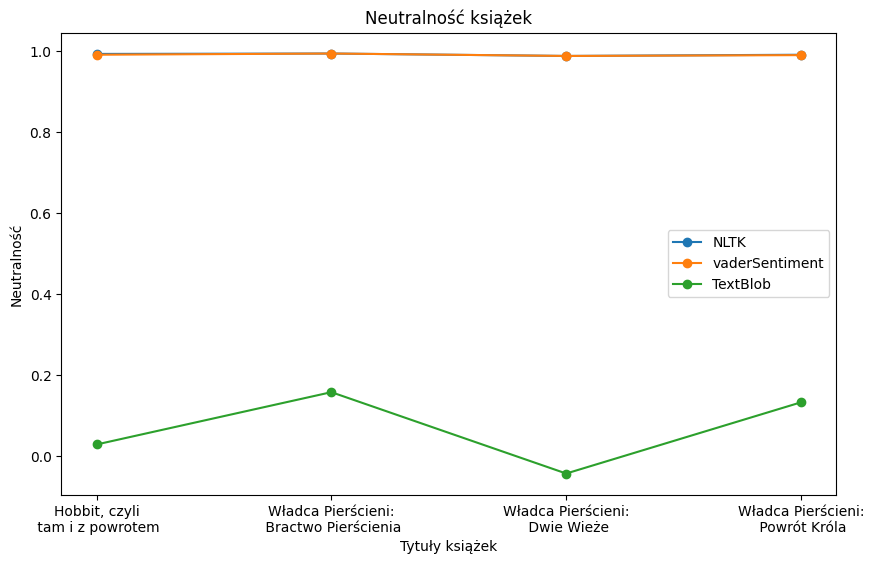

In [38]:
import matplotlib.pyplot as plt

books = ['Hobbit, czyli\n tam i z powrotem', 'Władca Pierścieni:\n Bractwo Pierścienia', 'Władca Pierścieni:\n Dwie Wieże', 'Władca Pierścieni:\n Powrót Króla']

#Wyniki neutralności
nltk_neutral = [book1_nltk_sentiment['neu'], book2_nltk_sentiment['neu'], book3_nltk_sentiment['neu'], book4_nltk_sentiment['neu']]
vader_neutral = [book1_vader_sentiment['neu'], book2_vader_sentiment['neu'], book3_vader_sentiment['neu'], book4_vader_sentiment['neu']]
textblob_neutral = [book1_textblob_sentiment, book2_textblob_sentiment, book3_textblob_sentiment, book4_textblob_sentiment]

#Utworzenie wykresu
plt.figure(figsize=(10, 6))

#Wykres dla NLTK
plt.plot(books, nltk_neutral, label='NLTK', marker='o')

#Wykres dla VaderSentiment
plt.plot(books, vader_neutral, label='vaderSentiment', marker='o')

#Wykres dla TextBlob
plt.plot(books, textblob_neutral, label='TextBlob', marker='o')

plt.title('Neutralność książek')
plt.xlabel('Tytuły książek')
plt.ylabel('Neutralność')
plt.legend()

plt.show()

Analiza wskaźników polaryzacji nastroju z wykorzystaniem bibliotek: `NLTK`, `TextBlob` i `vaderSentiment`, pozwala nam ocenić neutralność treści zawartych w poszczególnych książkach.

W przypadku biblioteki `NLTK`, wartości `'neu'` wskazują na neutralność tekstu. Wyniki pokazują, że wszystkie cztery książki mają wysokie wartości neutralności, co oznacza, że większość treści tych książek jest neutralna.

Przy użyciu biblioteki `TextBlob`, wskaźniki polaryzacji nastroju są wyrażone jako liczby z zakresu od -1 do 1, gdzie wartość bliska 0 wskazuje na neutralność. Analiza wskazuje, że większość książek osiąga wartości bliskie zeru, co sugeruje neutralność ich treści. Jednak książka "Władca pierścieni. Bractwo Pierścienia. Tom 1" ma wartość polaryzacji nastroju nieco wyższą od pozostałych książek, co może wskazywać na większą zmienność nastroju w tej części sagi.

W przypadku biblioteki `vaderSentiment`, wartość neu również wskazuje na neutralność tekstu. Wszystkie cztery książki mają wysokie wartości neutralności, co podobnie jak w przypadku NLTK sugeruje, że większość treści w tych książkach jest neutralna.

Podsumowując, analiza wskaźników polaryzacji nastroju z użyciem tych 3 bibliotek wskazuje na fakt, iż treści w badanych książkach są neutralne. Wydaje się to być oczywistym wnioskiem, ponieważ powieści fantastyczne charakteryzują się stylem oraz tonem pozbawionym wyrażeń mających na celu coś lub kogoś pochwalić albo obrazić, dlatego trudno tu mowić o pozytywnym bądź negatywnym nacechowaniu. Tego typu książki nasycone są morałami, alegoriami oraz treścią budzącą u czytelnika emocje, nawołującą go do refleksji i własnej interpretacji, jednak same w sobie mają neutralny wydźwięk.